# Basics of prospect model usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Note: prosail is not supported in python version > 3.12
import prosail 

In [15]:
help(prosail.run_prospect)

Help on function run_prospect in module prosail.prospect_d:

run_prospect(n, cab, car, cbrown, cw, cm, ant=0.0, prospect_version='D', nr=None, kab=None, kcar=None, kbrown=None, kw=None, km=None, kant=None, alpha=40.0)
    The PROSPECT model, versions 5 and D



##### Leaf parameters required for prospect
- **N**:       Leaf structure parameter (dimensionless)
- **Cab**:     Chlorophyll content (ug/cm^2)
- **Car**:     Carotenoid content (ug/cm^2)
- **Cbrown**:  Brown pigment (dimensionless, typically 0 if leaves are not senescent)
- **Cw**:      Water content (g/cm^2)
- **Cm**:      Dry matter (g/cm^2)
- **ant**:     Anthocyanin content (g/cm^2) (only valid for prospect_version='D')
- **nr**:      Refractive index spectrum of leaf material

- **kab, kcar, kbrown, kw, km, kant**: specifies the absorbtion coefficients of Chlorophyll, Carotenoid content, Brown pigment,  water, dry matter and anthocyanins  respectively.


##### Defining leaf parameters

In [16]:
N       = 1.3
Cab     = 30
Car     = 10
Cbrown  = 0
Cw      = 0.01
Cm      = 0.01

### Plotting single leaf spectrum

In [17]:
#Runnig the model
wave, refl ,trans = prosail.run_prospect(N, Cab, Car, Cbrown, Cw, Cm)

In [18]:
#Output contains spectral range over which the PROSPECT model computes leaf optical properties.
print(type(wave))
print(wave)

#Output the reflectance spectrum
print(type(refl))
print(refl)

#trans output tranmittance spectrum

<class 'numpy.ndarray'>
[ 400  401  402 ... 2498 2499 2500]
<class 'numpy.ndarray'>
[0.04309569 0.04309574 0.04309596 ... 0.02687588 0.02670677 0.0267727 ]


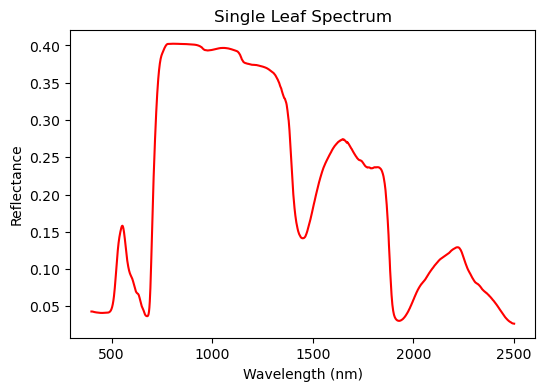

In [19]:
plt.figure(figsize=(6,4))
plt.plot(wave, refl, color = 'red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Single Leaf Spectrum')
plt.show()

### Plotting leaf spectra with varying chlorophyl content

In [20]:
Cab_values = np.arange(30, 80, 10)

#just to obtain the length of wave array
wave, _, _ = prosail.run_prospect(N, Cab_values[0], Car, Cbrown, Cw, Cm)

#Creating  2d arrays
refl = np.zeros((len(Cab_values), len(wave)))  # Reflectance
trans = np.zeros((len(Cab_values), len(wave)))  # Transmittance

for i, cab in enumerate(Cab_values):
    wave, refl[i, :], trans[i,:] = prosail.run_prospect(N, cab, Car, Cbrown, Cw, Cm)

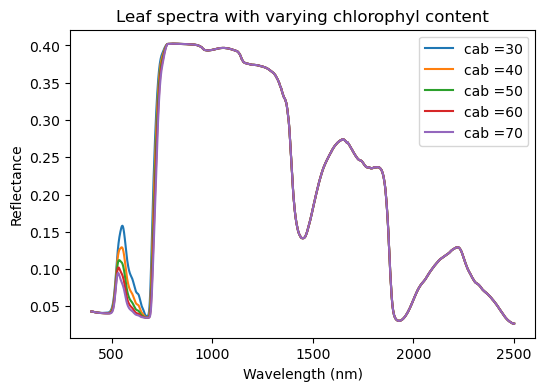

In [21]:
#Plotting

plt.figure(figsize= (6,4))

for i, cab in enumerate(Cab_values):
    plt.plot(wave, refl[i,:], label=f"cab ={cab}")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title("Leaf spectra with varying chlorophyl content")
plt.legend()
plt.show()

As chlorphyl content increases the reflectance in the visible region decreases

### Ploting leaf spectra with varying water content

In [22]:
Cw_values = np.linspace(0, 0.05, 500)

#Creating 2d arrays
refl = np.zeros((len(Cw_values), len(wave)))  # Reflectance
trans = np.zeros((len(Cw_values), len(wave)))  # Transmittance

for i, Cw in enumerate(Cw_values):
    wave, refl[i, :], trans[i,:] = prosail.run_prospect(N, cab, Car, Cbrown, Cw, Cm)

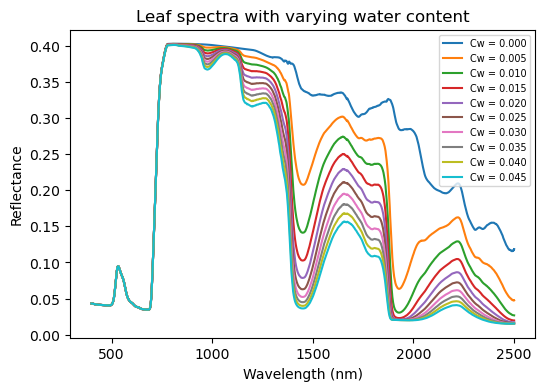

In [23]:
#Plotting

plt.figure(figsize= (6,4))


#plotting at every 50th interfal
for i in range(0, len(Cw_values), 50):
    #label would be rounded to 3 decimal places
    plt.plot(wave, refl[i,:], label=f"Cw = {Cw_values[i]:.3f}")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title("Leaf spectra with varying water content")
plt.legend(fontsize=7)
plt.show()

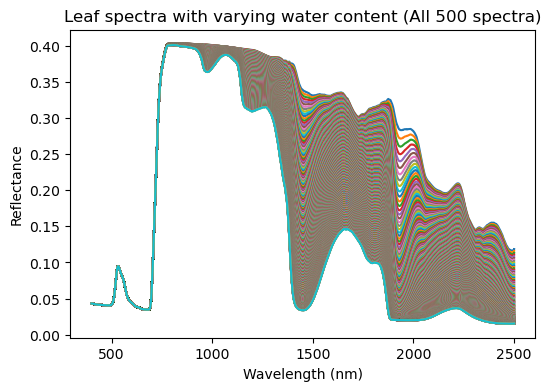

In [24]:
#Plotting

plt.figure(figsize= (6,4))

for i, Cw in enumerate(Cw_values):
    plt.plot(wave, refl[i,:])

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title("Leaf spectra with varying water content (All 500 spectra)")
plt.show()

As water content increases wavelength in certain regions tend to decrease due the absorbtion (especially within SWIR region)

#### Computing and plotting mean and standard deviation of the spectral library obtained above

In [25]:
#axis=0 computes mean across the rows (vertically)
mean_refl = np.mean(refl, axis=0)
std_refl = np.std(refl, axis=0)

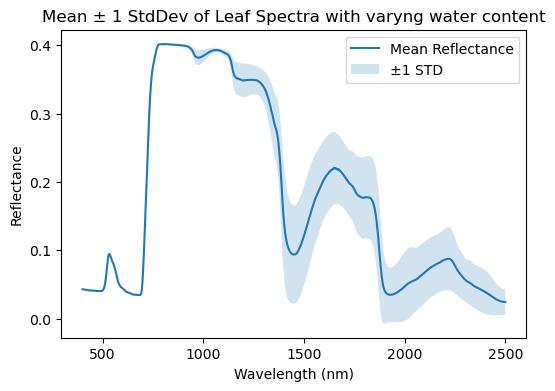

In [26]:
# Plotting

plt.figure(figsize=(6,4))
plt.plot(wave, mean_refl, label='Mean Reflectance')
plt.fill_between(
    wave,
    mean_refl - std_refl,
    mean_refl + std_refl,
    alpha = 0.2,
    label = "±1 STD"
)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Mean ± 1 StdDev of Leaf Spectra with varyng water content')
plt.legend()
plt.show()